In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
dados = pd.read_csv('MICRODADOS_ENEM_2021.csv', encoding='cp1252', sep =';')

In [5]:
pd.set_option('display.max_columns', 76)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2304202.0,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2311603.0,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B


In [20]:
participante = dados[['NU_INSCRICAO','TP_FAIXA_ETARIA','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE',
                'TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA','TP_ENSINO','IN_TREINEIRO']]

In [30]:
participante.columns = ['Id','Idade','Sexo','Estado Civil','Cor','Nacionalidade','Situação EM',
                        'Formação EM','Tipo Escola','Tipo Ensino','Treineer']
participante

,Id,Idade,Sexo,Estado Civil,Cor,Nacionalidade,Situação EM,Formação EM,Tipo Escola,Tipo Ensino,Treineer
0,210053865474,5,F,1,1,1,1,3,1,NaN,0
1,210052384164,12,M,1,1,1,1,11,1,NaN,0
2,210052589243,13,F,3,1,1,1,15,1,NaN,0
3,210052128335,3,M,1,3,1,2,0,2,1.0,0
4,210051353021,2,F,1,3,1,2,0,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3389827,210053249138,7,F,1,3,1,1,0,1,NaN,0
3389828,210053776013,7,F,1,1,1,1,5,1,NaN,0
3389829,210052441508,13,F,1,3,1,1,15,1,NaN,0
3389830,210051139675,7,F,1,1,1,1,4,1,NaN,0


## Análises com pessoas classificadas como Idosas (mais de 60 anos)

In [61]:
idosos = participante.query('Idade == 20 or Idade == 19 or Idade == 18')
idosos

,Id,Idade,Sexo,Estado Civil,Cor,Nacionalidade,Situação EM,Formação EM,Tipo Escola,Tipo Ensino,Treineer
295,210053795540,19,F,2,3,1,1,0,1,NaN,0
696,210053462749,20,M,1,1,1,1,15,1,NaN,0
4013,210051128822,18,M,2,1,1,1,15,1,NaN,0
4160,210052888700,19,M,3,3,1,1,15,1,NaN,0
4228,210052975308,18,M,3,1,4,1,15,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
3387858,210053002705,18,M,2,3,1,1,15,1,NaN,0
3388065,210052641287,18,F,2,3,1,1,15,1,NaN,0
3389330,210051378453,18,F,4,1,1,1,0,1,NaN,0
3389449,210051192766,19,F,3,3,1,1,12,1,NaN,0


In [139]:
notas = dados[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']]
notas.columns = ['NotaCN', 'NotaCH','NotaLC', 'NotaMT','Redacao']
notas

,NotaCN,NotaCH,NotaLC,NotaMT,Redacao
0,NaN,574.6,472.6,NaN,760.0
1,505.9,551.8,498.3,461.5,560.0
2,NaN,NaN,NaN,NaN,NaN
3,580.7,678.9,638.9,659.5,780.0
4,497.7,532.4,457.6,582.6,780.0
...,...,...,...,...,...
3389827,NaN,NaN,NaN,NaN,NaN
3389828,NaN,NaN,NaN,NaN,NaN
3389829,NaN,NaN,NaN,NaN,NaN
3389830,563.7,646.0,550.7,706.4,660.0


In [154]:
notas_idosos = pd.concat([idosos,notas], axis = 1)
nulos= notas_idosos['Id'].isnull()
notas_idosos.dropna(subset = ['Id'], inplace= True)
notas_idosos.drop(columns=['Tipo Ensino'], inplace = True)
notas_idosos.dropna(subset =['NotaCN'], inplace= True)
notas_idosos.dropna(inplace = True)
notas_idosos.index = range(notas_idosos.shape[0])

In [157]:
notasIdosos = notas_idosos.drop(columns=['Id'])
notasIdosos

,Idade,Sexo,Estado Civil,Cor,Nacionalidade,Situação EM,Formação EM,Tipo Escola,Treineer,NotaCN,NotaCH,NotaLC,NotaMT,Redacao
0,18.0,M,3.0,1.0,4.0,1.0,15.0,1.0,0.0,626.7,693.7,601.3,638.1,600.0
1,19.0,M,2.0,1.0,1.0,1.0,15.0,1.0,0.0,514.7,461.1,427.7,701.4,800.0
2,19.0,F,1.0,1.0,1.0,1.0,15.0,1.0,0.0,405.5,567.1,401.9,447.0,560.0
3,18.0,M,0.0,3.0,1.0,1.0,15.0,1.0,0.0,513.6,558.8,456.1,445.9,500.0
4,18.0,M,3.0,1.0,1.0,1.0,0.0,1.0,0.0,495.7,549.5,477.1,407.6,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,18.0,F,1.0,1.0,1.0,1.0,0.0,1.0,0.0,420.6,569.2,518.5,479.5,300.0
3266,18.0,M,2.0,2.0,1.0,1.0,15.0,1.0,0.0,494.8,521.9,422.8,460.6,580.0
3267,18.0,F,2.0,1.0,1.0,1.0,15.0,1.0,0.0,453.9,419.1,439.0,434.2,580.0
3268,18.0,F,2.0,1.0,1.0,1.0,15.0,1.0,0.0,500.9,431.1,415.3,445.8,520.0


In [174]:
notasIdosos['Media'] = (notasIdosos.NotaCN+ notasIdosos.NotaCH+ notasIdosos.NotaLC+ notasIdosos.NotaMT+ notasIdosos.Redacao)/5
notasIdosos.Media.max()
notasIdosos

,Idade,Sexo,Estado Civil,Cor,Nacionalidade,Situação EM,Formação EM,Tipo Escola,Treineer,NotaCN,NotaCH,NotaLC,NotaMT,Redacao,Media
0,18.0,M,3.0,1.0,4.0,1.0,15.0,1.0,0.0,626.7,693.7,601.3,638.1,600.0,631.96
1,19.0,M,2.0,1.0,1.0,1.0,15.0,1.0,0.0,514.7,461.1,427.7,701.4,800.0,580.98
2,19.0,F,1.0,1.0,1.0,1.0,15.0,1.0,0.0,405.5,567.1,401.9,447.0,560.0,476.30
3,18.0,M,0.0,3.0,1.0,1.0,15.0,1.0,0.0,513.6,558.8,456.1,445.9,500.0,494.88
4,18.0,M,3.0,1.0,1.0,1.0,0.0,1.0,0.0,495.7,549.5,477.1,407.6,480.0,481.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,18.0,F,1.0,1.0,1.0,1.0,0.0,1.0,0.0,420.6,569.2,518.5,479.5,300.0,457.56
3266,18.0,M,2.0,2.0,1.0,1.0,15.0,1.0,0.0,494.8,521.9,422.8,460.6,580.0,496.02
3267,18.0,F,2.0,1.0,1.0,1.0,15.0,1.0,0.0,453.9,419.1,439.0,434.2,580.0,465.24
3268,18.0,F,2.0,1.0,1.0,1.0,15.0,1.0,0.0,500.9,431.1,415.3,445.8,520.0,462.62


In [175]:
notamax = notasIdosos.query('Media > 778')
notamax

,Idade,Sexo,Estado Civil,Cor,Nacionalidade,Situação EM,Formação EM,Tipo Escola,Treineer,NotaCN,NotaCH,NotaLC,NotaMT,Redacao,Media
1333,18.0,M,2.0,1.0,1.0,1.0,15.0,1.0,0.0,668.6,757.5,677.2,831.0,960.0,778.86


In [182]:
cor = { 0: 'Não declarado',
        1: 'Branca',
        2: 'Preta',
        3: 'Parda',
        4: 'Amarela',
        5: 'Indígena',
        6: 'Não dispõe da informação'
}

sexo = {
    'M': 'Masculino',
    'F': 'Feminino'
}

In [188]:
medias = pd.crosstab(notasIdosos.Cor, notasIdosos.Sexo,notasIdosos.Media,
                    aggfunc={'mean','min','max'})
medias.rename(index = cor, inplace= True)
medias.rename(columns= sexo, inplace =True)
medias = medias.round(2)
medias

max               mean                min          
Sexo          Feminino Masculino Feminino Masculino Feminino Masculino
Cor                                                                   
Não declarado   641.76    669.36   486.34    518.70   355.14    366.42
Branca          707.50    778.86   474.04    518.27   231.76    236.58
Preta           620.58    686.76   449.92    468.70   264.24    136.84
Parda           651.98    742.06   455.44    483.73   218.62    158.78
Amarela         590.78    713.86   482.33    533.76   356.20    345.70
Indígena        511.34    607.04   433.20    493.23   315.08    433.64

<AxesSubplot:title={'center':'Medias por Sexo'}, xlabel='Medias (Peso 1)', ylabel='Cor'>

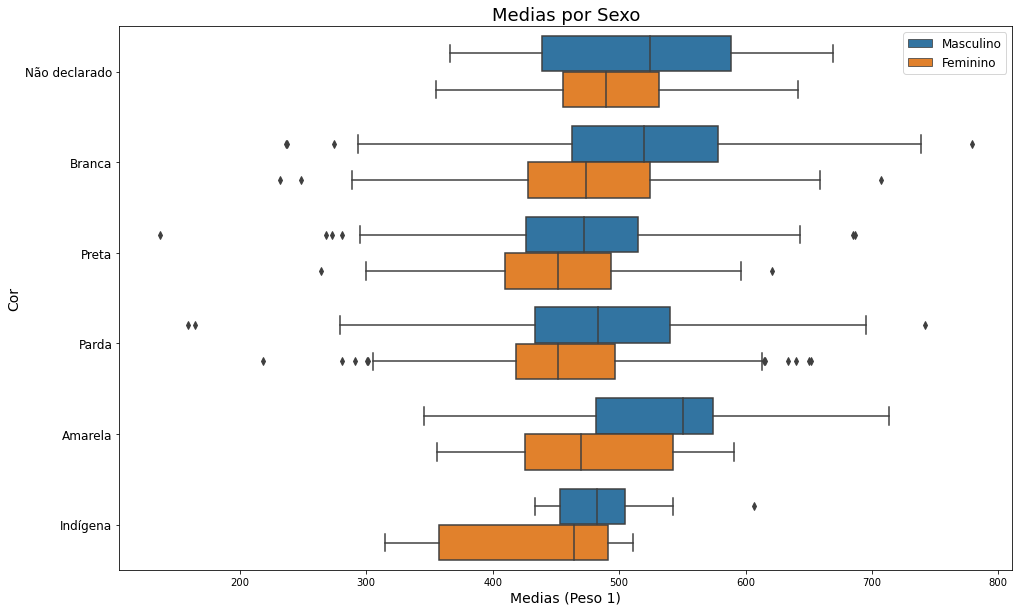

In [202]:
bx_medias = sns.boxplot(x = 'Media', y = 'Cor',hue = 'Sexo',data=notasIdosos, orient ='h')
bx_medias.figure.set_size_inches(16,10)
bx_medias.set_title('Medias por Sexo', fontsize = 18)
bx_medias.set_xlabel('Medias (Peso 1)', fontsize = 14)
bx_medias.set_ylabel('Cor', fontsize = 14)
bx_medias.set_yticklabels(['Não declarado','Branca','Preta','Parda','Amarela','Indígena'],
                         fontsize= 12)

handles, _ = bx_medias.get_legend_handles_labels()
bx_medias.legend(handles, ['Masculino', 'Feminino'], fontsize = 12)
bx_medias